In [2]:
# For changing directory
import os

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd

import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif

In [4]:
os.chdir("C:\\Users\\91770\\3D Objects\\Python\\Python class code files\\Logistic Regression\\Chandra_Logistic Regression\\3. Logistic Regression")

In [5]:
hr_data= pd.read_csv('2. HR Analytics - Predicting employee Attrition/HR_comma_sep.csv')

In [6]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
#Running Pandas Profiling
report= pandas_profiling.ProfileReport(hr_data)

In [10]:
report.to_file('hr_data.html')

### missing value treatment

In [11]:
#Checking missing values

hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [12]:
def missing_value_treatment(x):
    if((x.dtypes == 'float64') | (x.dtypes=='int64')):
        
        x= x.fillna(x.median())
    else:
         x=x.fillna(x.mode()[0])
    return x

In [13]:
hr_data= hr_data.apply(missing_value_treatment)

In [14]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Outlier treatment

In [15]:
#Checking Outliers
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
def outlier_treatment(x):
    if((x.dtypes=='float64') | (x.dtypes=='int64')):
        x=x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99))
    else:
        x
    return x

In [17]:
hr_data= hr_data.apply(outlier_treatment)

In [18]:
hr_data.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612760,0.716252,3.803054,201.034802,3.498233,0.144610,0.238083,0.021268
std,0.248517,0.170873,1.232592,49.771459,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.390000,2.000000,104.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,0.990000,1.000000,7.000000,301.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
# Seperating numerical and categorical columns for assumption checking later on

num_var = hr_data.select_dtypes(include=['float64', 'int64'])
cat_var= hr_data.select_dtypes(include= 'object')

### Creating Ordinal Categories for 'salary' variable

In [20]:
mapper = {'low':0, 'medium':1,'high':2}
hr_data['salary_ordinal']= hr_data['salary'].replace(mapper)
hr_data.drop(columns= ['salary'], axis=1, inplace=True)

In [21]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_ordinal
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [22]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary_ordinal             int64
dtype: object

### Creating Dummy variables for 'department' variable

In [23]:
hr_datafinal= pd.get_dummies(hr_data, columns= ['department'], drop_first= True)

In [24]:
hr_datafinal

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_ordinal,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0


In [25]:
hr_datafinal.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
salary_ordinal              int64
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

### Clean data

In [26]:

hr_datafinal.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_ordinal,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0


## Running Logistic Regression

### Assumptions 

In [27]:
## Correlation b.w X and Y variables should be there (Partially fulfilled)
num_var.corrwith(num_var.left)

satisfaction_level      -0.388386
last_evaluation          0.006086
number_project           0.023787
average_montly_hours     0.069358
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
dtype: float64

<AxesSubplot:>

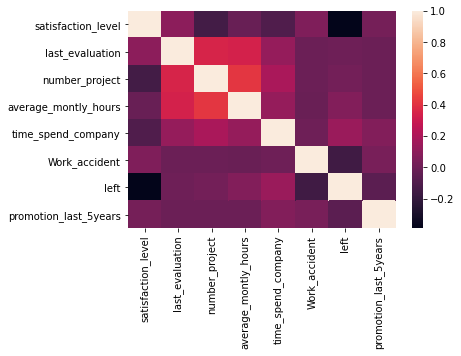

In [28]:
### Correlation b.w X and X variables (should be minimal)
sns.heatmap(num_var.corr())

In [29]:
#No missings
hr_datafinal.isna().sum()


satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
salary_ordinal            0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
dtype: int64

<AxesSubplot:>

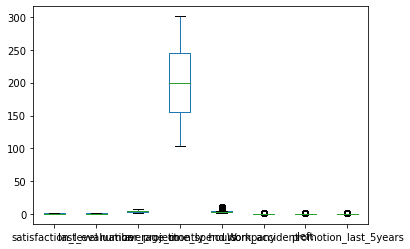

In [30]:
#No outliers in numerical columns
num_var.plot(kind='box')

##############################################################

- Till this point our dataset is cleans bcz
    - No Missing
    - No Outliers (Mild Outliers)
    - No Variables with incorrect data type
    - Dummy Encoding  has been done
    - hot encoding(for ordinal var) has been done.

## Feature Reduction

### method 1: IV(information value)

In [31]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [32]:
for col in hr_datafinal:
    if col == 'left': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(hr_datafinal, col, 'left')
       # print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: satisfaction_level


C:\Users\91770\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score: 2.05


WoE and IV for column: last_evaluation
IV score: 1.17


WoE and IV for column: number_project
IV score: 2.05


WoE and IV for column: average_montly_hours


C:\Users\91770\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\91770\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score: 0.89


WoE and IV for column: time_spend_company
IV score: 1.09


WoE and IV for column: Work_accident
IV score: 0.19


WoE and IV for column: promotion_last_5years
IV score: 0.03


WoE and IV for column: salary_ordinal
IV score: 0.18


WoE and IV for column: department_RandD
IV score: 0.01


WoE and IV for column: department_accounting
IV score: 0.00


WoE and IV for column: department_hr
IV score: 0.00


WoE and IV for column: department_management
IV score: 0.01


WoE and IV for column: department_marketing
IV score: 0.00


WoE and IV for column: department_product_mng
IV score: 0.00


WoE and IV for column: department_sales
IV score: 0.00


WoE and IV for column: department_support
IV score: 0.00


WoE and IV for column: department_technical
IV score: 0.00




In [33]:
l_iv= ['department_technical','department_support', 'department_sales', 'department_product_mng', 'department_marketing', 
       'department_management','department_hr', 'department_accounting', 'department_RandD', 'salary_ordinal',  
       'promotion_last_5years', 'Work_accident', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']

### method 2: Sommer's D

In [34]:
### As we want this to Sommer'D to be calculated for each X variable seperately. 
### We may have to dothis manually as we do not have a ready made function for this.somerced_val = pd.DataFrame()
somerced_val = pd.DataFrame()
for i_var in hr_datafinal.columns.difference(['left']):
    model = smf.logit('left~'+str(i_var), data=hr_datafinal).fit()
    somerce_d = 2*metrics.roc_auc_score(hr_datafinal.left, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.534317
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546452
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547669
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548747
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548478
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547682
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548859
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548798
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548811
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548803
  

In [35]:
somerced_val

,0,1
0,Work_accident,0.127683
0,average_montly_hours,0.0629711
0,department_RandD,0.0243938
0,department_accounting,0.00786189
0,department_hr,0.0143549
0,department_management,0.0216818
0,department_marketing,0.000468544
0,department_product_mng,0.00615643
0,department_sales,0.0104154
0,department_support,0.00893633


In [36]:
somerced_val.columns = ['feature', 'somerce_d']

In [37]:
somerced_val.sort_values(by='somerce_d', ascending=False, inplace=True)
l1_sd = somerced_val[somerced_val.somerce_d>=0.10].feature.values

In [38]:
l1_sd

array(['satisfaction_level', 'time_spend_company', 'salary_ordinal',
       'Work_accident'], dtype=object)

In [39]:
X = hr_datafinal[hr_datafinal.columns.difference(['left'])]
y = hr_datafinal.left

### method 3: RFE

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=10).fit(X,y)

In [42]:
X.columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_ordinal',
       'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [43]:
l2_rfe = X.columns[rfe.get_support()]

In [44]:
l2_rfe

Index(['Work_accident', 'average_montly_hours', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'salary_ordinal', 'satisfaction_level',
       'time_spend_company'],
      dtype='object')

### method 4: select K best

In [45]:
SKB = SelectKBest(f_classif, k=10).fit(X, y )

In [46]:
l3_skb = X.columns[SKB.get_support()]

In [47]:
l3_skb

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_hr', 'department_management', 'number_project',
       'promotion_last_5years', 'salary_ordinal', 'satisfaction_level',
       'time_spend_company'],
      dtype='object')

In [48]:
l1_sd

array(['satisfaction_level', 'time_spend_company', 'salary_ordinal',
       'Work_accident'], dtype=object)

In [49]:
list(set(l_iv+list(l1_sd)+list(l2_rfe)+list(l3_skb)))

['department_marketing',
 'average_montly_hours',
 'department_technical',
 'time_spend_company',
 'department_hr',
 'Work_accident',
 'department_product_mng',
 'number_project',
 'department_sales',
 'salary_ordinal',
 'promotion_last_5years',
 'department_accounting',
 'satisfaction_level',
 'last_evaluation',
 'department_management',
 'department_RandD',
 'department_support']

In [50]:
Final_list = [
 'time_spend_company',
 #'average_montly_hours',
 'department_hr',
 'department_support',
 'satisfaction_level',
 'department_management',
 'salary_ordinal',
 #'last_evaluation',
 'department_product_mng',
 'number_project',
 'department_RandD',
 'Work_accident',
 'department_accounting',
 'department_technical',
 'promotion_last_5years',
 'department_marketing',
 'department_sales']

In [51]:
X_new= X[Final_list]
y=y

### VIF

In [52]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [53]:
vif.sort_values(by= 'VIF_Factor', ascending= False, inplace= True)
vif

,VIF_Factor,features
7,8.225215,number_project
0,6.360446,time_spend_company
3,5.393340,satisfaction_level
14,3.197516,department_sales
11,2.444764,department_technical
2,2.173911,department_support
5,1.912060,salary_ordinal
6,1.482135,department_product_mng
13,1.458632,department_marketing
4,1.441943,department_management


In [54]:
hr_datanew= pd.concat([X_new, y], axis=1)

In [55]:
hr_datanew.columns

Index(['time_spend_company', 'department_hr', 'department_support',
       'satisfaction_level', 'department_management', 'salary_ordinal',
       'department_product_mng', 'number_project', 'department_RandD',
       'Work_accident', 'department_accounting', 'department_technical',
       'promotion_last_5years', 'department_marketing', 'department_sales',
       'left'],
      dtype='object')

**Summary for Feature Reduction**
- Can find important variables as per IV(information value)
- Can find important variables as per Sommer's D
- Can find important variables as per RFE
- There were no variables having VIF geater than 10

### Splitting the data into train and test

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train, test = train_test_split(hr_datanew, test_size=0.3, random_state=123)

In [58]:
train.shape

(10499, 16)

In [59]:
test.shape

(4500, 16)

In [60]:
train.columns

Index(['time_spend_company', 'department_hr', 'department_support',
       'satisfaction_level', 'department_management', 'salary_ordinal',
       'department_product_mng', 'number_project', 'department_RandD',
       'Work_accident', 'department_accounting', 'department_technical',
       'promotion_last_5years', 'department_marketing', 'department_sales',
       'left'],
      dtype='object')

#### Finding the Best Value of Threshold to calculate the other Accuracy metrics that use the predicted class

##### method1. taking cutoff %1's in Y variable

In [67]:
print('% of 1s in Y: ', train.left.mean())

% of 1s in Y:  0.23811791599199925


##### Creating a table for train & test data having the actual labels and the predicted probabilities

In [68]:
train_pred_prob = pd.DataFrame( model_logit.predict(train))
train_pred_prob.columns = ['prob']
train_actual = train['left']
train_predict = pd.concat([train_actual,train_pred_prob],axis = 1)

In [69]:
train_predict.head()

,left,prob
5242,0,0.087803
12674,1,0.465228
6924,0,0.678999
12595,1,0.744775
13482,0,0.090369


In [70]:
test_pred_prob = pd.DataFrame( model_logit.predict(test))
test_pred_prob.columns = ['prob']
test_actual = test['left']
test_predict = pd.concat([test_actual,test_pred_prob],axis = 1)

In [71]:
test_predict.head()

,left,prob
6958,0,0.092776
7534,0,0.077397
2975,0,0.046539
3903,0,0.136050
8437,0,0.120744


In [72]:
hr_datanew.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [73]:
round(3571 / (11428+183),2)  ## we can also Consider this value as the threshold value

0.31

##### method2. Getting cutoff that gives highest sensitivity+specificity

In [74]:
roc_df = pd.DataFrame()
train_temp= train_predict.copy()
for cut_off in np.linspace(0,1):
    #roc_df_temp['cut_off'] = cut_off
    train_temp['y_pred'] = np.where(train_temp.prob>cut_off, 1, 0)
    train_temp['TP'] = np.where(((train_temp.left ==1) & (train_temp.y_pred==1)), 1, 0)
    train_temp['TN'] = np.where(((train_temp.left ==0) & (train_temp.y_pred==0)), 1, 0)
    train_temp['FP'] = np.where(((train_temp.left ==0) & (train_temp.y_pred==1)), 1, 0)
    train_temp['FN'] = np.where(((train_temp.left ==1) & (train_temp.y_pred==0)), 1, 0)
    sensitivity = train_temp['TP'].sum() / (train_temp['TP'].sum() + train_temp['FN'].sum())
    specificity = train_temp['TN'].sum() / (train_temp['TN'].sum() + train_temp['FP'].sum())
    accuracy = (train_temp['TP'].sum()  + train_temp['TN'].sum() ) / (train_temp['TP'].sum() + train_temp['FN'].sum() + train_temp['TN'].sum() + train_temp['FP'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, roc_like_table], axis=0)

In [75]:
 roc_like_table

,cutoff,sensitivity,specificity,accuracy
0,1.0,0.0,1.0,0.761882


In [76]:
roc_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.0000,0.000000,0.238118
0,0.020408,0.9976,0.059507,0.282884
0,0.040816,0.9892,0.152894,0.352034
0,0.061224,0.9768,0.249656,0.422802
0,0.081633,0.9672,0.338917,0.488523


In [77]:
roc_df['Total'] = roc_df.sensitivity+roc_df.specificity

In [78]:
best_cutoff = roc_df.sort_values(by='Total', ascending=False).head(1).cutoff[0]
print('Best_cutoff: ', best_cutoff)

Best_cutoff:  0.3061224489795918


In [79]:
roc_df.head()

,cutoff,sensitivity,specificity,accuracy,Total
0,0.000000,1.0000,0.000000,0.238118,1.000000
0,0.020408,0.9976,0.059507,0.282884,1.057107
0,0.040816,0.9892,0.152894,0.352034,1.142094
0,0.061224,0.9768,0.249656,0.422802,1.226456
0,0.081633,0.9672,0.338917,0.488523,1.306117


##### Finding the classes with best cutoff (0.30) we got and attaching to train_predict & test_predict tables we created earlier

In [80]:
train_predict['y_pred'] = np.where(train_predict.prob>best_cutoff, 1,0)

In [81]:
test_predict['y_pred'] = np.where(test_predict.prob>best_cutoff, 1,0)

In [82]:
#Crosstable for train data

pd.crosstab(train_predict.left, train_predict.y_pred, margins=True)

y_pred,0,1,All
left,,,
0,6538,1461,7999
1,816,1684,2500
All,7354,3145,10499


In [83]:
print(metrics.classification_report(train_predict.left, train_predict.y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      7999
           1       0.54      0.67      0.60      2500

    accuracy                           0.78     10499
   macro avg       0.71      0.75      0.72     10499
weighted avg       0.80      0.78      0.79     10499



In [84]:
#Crosstable for test data

pd.crosstab(test_predict.left, test_predict.y_pred, margins=True)

y_pred,0,1,All
left,,,
0,2797,632,3429
1,348,723,1071
All,3145,1355,4500


In [85]:
print(metrics.classification_report(test_predict.left, test_predict.y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3429
           1       0.53      0.68      0.60      1071

    accuracy                           0.78      4500
   macro avg       0.71      0.75      0.72      4500
weighted avg       0.80      0.78      0.79      4500



In [86]:
train_predict.head()

,left,prob,y_pred
5242,0,0.087803,0
12674,1,0.465228,1
6924,0,0.678999,1
12595,1,0.744775,1
13482,0,0.090369,0


### Decile Analysis: Calculating the KS Value and coming up with the Decile Analysis Table 

### Train

In [87]:
train_predict['Deciles'] = pd.qcut(train_predict['prob'],10,labels=False)

In [88]:
train_predict

,left,prob,y_pred,Deciles
5242,0,0.087803,0,2
12674,1,0.465228,1,8
6924,0,0.678999,1,9
12595,1,0.744775,1,9
13482,0,0.090369,0,3
...,...,...,...,...
5218,0,0.058855,0,1
12252,1,0.513414,1,8
1346,1,0.353186,1,7
11646,0,0.174958,0,5


In [89]:
no_1s = train_predict[['Deciles','left']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['left']
no_total = train_predict[['Deciles','left']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['left']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

Deciles
9    0.893639
8    0.558367
7    0.411905
6    0.308317
5    0.222756
4    0.169609
3    0.127961
2    0.094371
1    0.062397
0    0.036819
Name: prob, dtype: float64

In [90]:
Decile_analysis_train = pd.concat([min_prob,max_prob,no_1s,no_total-no_1s,no_total],axis=1)

In [91]:
Decile_analysis_train.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [92]:
Decile_analysis_train

,Min_prob,Max_prob,#1,#0,Total
Deciles,,,,,
9,0.561906,0.893639,609,441,1050
8,0.427370,0.561878,669,381,1050
7,0.306115,0.427191,409,639,1048
6,0.219062,0.306079,194,858,1052
5,0.164292,0.218841,229,820,1049
4,0.121071,0.164278,165,884,1049
3,0.090369,0.121032,113,938,1051
2,0.062376,0.090277,54,996,1050
1,0.035546,0.062354,34,1016,1050


In [93]:
Decile_analysis_train.reset_index()

,Deciles,Min_prob,Max_prob,#1,#0,Total
0,9,0.561906,0.893639,609,441,1050
1,8,0.427370,0.561878,669,381,1050
2,7,0.306115,0.427191,409,639,1048
3,6,0.219062,0.306079,194,858,1052
4,5,0.164292,0.218841,229,820,1049
5,4,0.121071,0.164278,165,884,1049
6,3,0.090369,0.121032,113,938,1051
7,2,0.062376,0.090277,54,996,1050
8,1,0.035546,0.062354,34,1016,1050
9,0,0.001136,0.035541,24,1026,1050


### Test

In [94]:
test_predict['Deciles'] = pd.qcut(test_predict['prob'],10,labels=False)

In [95]:
test_predict

,left,prob,y_pred,Deciles
6958,0,0.092776,0,2
7534,0,0.077397,0,2
2975,0,0.046539,0,1
3903,0,0.136050,0,4
8437,0,0.120744,0,3
...,...,...,...,...
8001,0,0.064717,0,2
11630,0,0.218841,0,5
8163,0,0.178831,0,5
4063,0,0.161738,0,4


In [96]:
no_1s = test_predict[['Deciles','left']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['left']
no_total = test_predict[['Deciles','left']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['left']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

In [97]:
Decile_analysis_test = pd.concat([min_prob,max_prob,no_1s,no_total-no_1s,no_total],axis=1)

In [98]:
Decile_analysis_test.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [99]:
Decile_analysis_test.reset_index()

,Deciles,Min_prob,Max_prob,#1,#0,Total
0,9,0.559933,0.893639,261,188,449
1,8,0.412130,0.558367,278,173,451
2,7,0.308832,0.411905,183,266,449
3,6,0.224149,0.308317,81,369,450
4,5,0.169638,0.222756,102,349,451
5,4,0.127994,0.169609,71,379,450
6,3,0.094394,0.127961,54,395,449
7,2,0.062505,0.094371,21,430,451
8,1,0.036860,0.062397,14,436,450
9,0,0.001514,0.036819,6,444,450
